In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Input,Flatten,Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from warnings import filterwarnings as ft
ft('ignore')

In [2]:
DataSetPath = "Bean_Dataset"

In [3]:
full_ds = tf.keras.utils.image_dataset_from_directory(
    'Bean_Dataset',
    image_size=(224, 224),
).map(lambda x, y: (x / 255.0, y))

x_full, y_full = [], []
for images, labels in full_ds:
    x_full.append(images.numpy())
    y_full.append(labels.numpy())
x_full = np.concatenate(x_full, axis=0)
y_full = np.concatenate(y_full, axis=0)
x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.3, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


Found 990 files belonging to 3 classes.
x_train shape: (693, 224, 224, 3)
y_train shape: (693,)
x_test shape: (297, 224, 224, 3)
y_test shape: (297,)


In [4]:
num_classes = 3 
y_train_one_hot = to_categorical(y_train, num_classes=num_classes) 
y_test_one_hot = to_categorical(y_test, num_classes=num_classes) 

In [5]:
CNN_model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    
    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(3, activation='softmax')
])
CNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history1 = CNN_model.fit(x_train, y_train_one_hot, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step - accuracy: 0.3755 - loss: 1.2934 - val_accuracy: 0.3885 - val_loss: 1.0744
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - accuracy: 0.4251 - loss: 1.0500 - val_accuracy: 0.6619 - val_loss: 0.9256
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 243ms/step - accuracy: 0.4834 - loss: 0.9914 - val_accuracy: 0.5468 - val_loss: 0.9146
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.5682 - loss: 0.9509 - val_accuracy: 0.6547 - val_loss: 0.8642
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - accuracy: 0.6198 - loss: 0.8435 - val_accuracy: 0.6259 - val_loss: 0.7686
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - accuracy: 0.6050 - loss: 0.8388 - val_accuracy: 0.6978 - val_loss: 0.7857
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - accuracy: 0.6451 - loss: 0.7730 - val_accuracy: 0.6259 - val_loss: 0.7432
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 236ms/step - accuracy: 0.6832 - loss: 0.7379 - val_accuracy: 0.

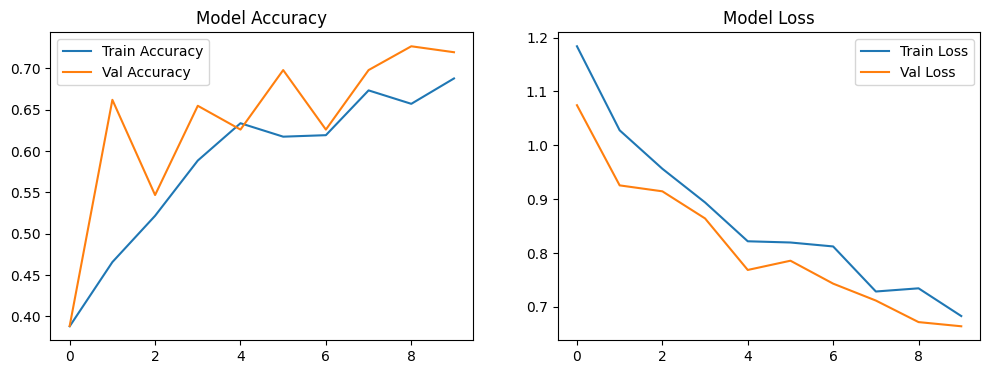

In [7]:
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

In [8]:
CNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,384,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,197,131 (16.01 MB)

 Trainable params: 1,399,043 (5.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,798,088 (10.67 MB)

In [9]:
# Evaluate the model
test_loss, test_accuracy = CNN_model.evaluate(x_test, y_test_one_hot)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6479 - loss: 0.7594
Test Accuracy: 67.34%


In [11]:
# Generate predictions and evaluate the model
y_pred = np.argmax(CNN_model.predict(x_test), axis=-1)
y_true = np.argmax(y_test_one_hot, axis=-1)

# Display the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.77      0.68        96
           1       0.69      0.40      0.51       104
           2       0.74      0.87      0.80        97

    accuracy                           0.67       297
   macro avg       0.68      0.68      0.66       297
weighted avg       0.68      0.67      0.66       297

Confusion Matrix:
[[74 11 11]
 [43 42 19]
 [ 5  8 84]]


In [12]:
DNN_model = Sequential([
    Flatten( input_shape=(224, 224, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])
DNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history2 = DNN_model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 938ms/step - accuracy: 0.3512 - loss: 72.0913 - val_accuracy: 0.5857 - val_loss: 29.2559
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 908ms/step - accuracy: 0.4325 - loss: 22.4497 - val_accuracy: 0.3857 - val_loss: 17.4164
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 849ms/step - accuracy: 0.4430 - loss: 10.8104 - val_accuracy: 0.5714 - val_loss: 2.6973
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 896ms/step - accuracy: 0.5286 - loss: 4.4453 - val_accuracy: 0.4571 - val_loss: 4.1382
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 874ms/step - accuracy: 0.5753 - loss: 3.0905 - val_accuracy: 0.6429 - val_loss: 1.4049
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 933ms/step - accuracy: 0.7159 - loss: 1.1571 - val_accuracy: 0.4000 - val_loss: 3.3484
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 937ms/step - accuracy: 0.6278 - loss: 1.4596 - val_accuracy: 0.6857 - val_loss: 1.0121
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 868ms/step - accuracy: 0.7903 - loss: 0.5996 - val

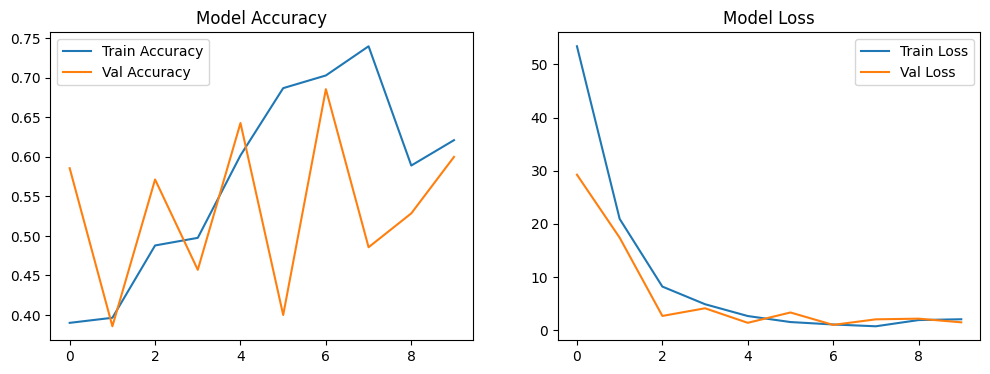

In [14]:
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

In [15]:
DNN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      77,070,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,608,843 (883.52 MB)

 Trainable params: 77,202,947 (294.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 154,405,896 (589.01 MB)

In [16]:
# Evaluate the model
test_loss, test_accuracy = DNN_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6189 - loss: 1.6990
Test Accuracy: 61.28%


In [60]:
# Generate predictions and evaluate the model
y_pred = np.argmax(DNN_model.predict(x_test), axis=-1)
# Display the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.41      0.57        95
           1       0.61      0.87      0.72        98
           2       0.78      0.88      0.82       104

    accuracy                           0.72       297
   macro avg       0.78      0.72      0.70       297
weighted avg       0.78      0.72      0.71       297

Confusion Matrix:
[[39 41 15]
 [ 2 85 11]
 [ 0 13 91]]
